In [64]:
import sqlite3

import numpy as np
import pandas as pd
import seaborn as sns

In [65]:
N_igefs = 1000

N_dummies = 75
N_effects = 5

p_dummy_tests = [0.95] * N_dummies
p_effect_tests = [0.99] * N_effects

In [66]:
igefs = []
tests = []
test_results = []

for igef in range(N_igefs):
    for id_effect, p_effect in enumerate(p_effect_tests):
        effect_samples = np.random.binomial(1, p_effect, size=(1,)).tolist()
        if not effect_samples[0]:
            effect_samples.append(1)
        test_results.extend(effect_samples)
        tests.extend([id_effect]*len(effect_samples))
        igefs.extend([igef]*len(effect_samples))
    for id_dummy, p_dummy_test in enumerate(p_dummy_tests):
        dummy_samples = np.random.binomial(1, p_dummy_test, size=(1,)).tolist()
        if not dummy_samples[0]:
            dummy_samples.append(1)
        test_results.extend(dummy_samples)
        tests.extend([id_dummy+N_effects]*len(dummy_samples))
        igefs.extend([igef]*len(dummy_samples))

len(igefs), len(tests), len(test_results)

(83864, 83864, 83864)

In [67]:
df = pd.DataFrame({'igef': igefs, 'test': tests, 'test_result': test_results})

target_df = df[df['test'] < N_effects].groupby('igef').apply(lambda x: 0 if 0 in x['test_result'].unique() else 1, include_groups=False)
target_df = target_df.to_frame().reset_index().rename(columns={0: 'test_result'})
target_df['test'] = N_effects + N_dummies

df = pd.concat([df, target_df])

df[['igef']] = df[['igef']].map(lambda igef: f'igef_{igef}')
df[['test']] = df[['test']].map(lambda test: f'test_{test}')
df[['test_result']] = df[['test_result']].map(lambda test_result: 'OK' if test_result else 'NOK')

df = df.sample(frac=1).reset_index(drop=True)

<Axes: xlabel='test_result', ylabel='Count'>

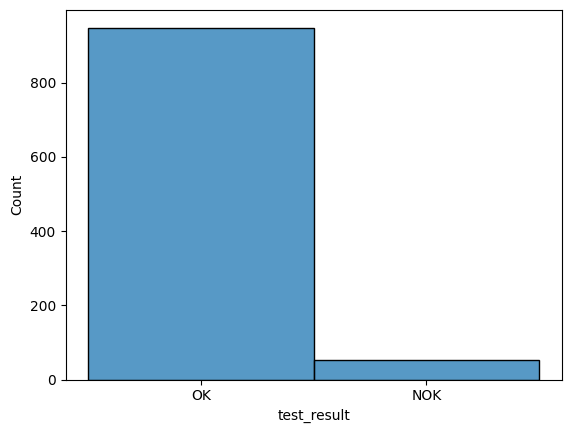

In [68]:
sns.histplot(df[df['test'] == 'test_80']['test_result'])

In [69]:

df

,igef,test,test_result
0,igef_186,test_16,NOK
1,igef_430,test_9,OK
2,igef_991,test_13,OK
3,igef_62,test_21,OK
4,igef_277,test_59,OK
...,...,...,...
84859,igef_606,test_42,OK
84860,igef_475,test_32,OK
84861,igef_814,test_7,OK
84862,igef_830,test_25,OK


In [71]:
conn = sqlite3.connect("dummy_data.db")

df.to_sql(
    name="dummy_data",
    con=conn,
    if_exists="replace",
    index=False
)

result = pd.read_sql("SELECT * FROM dummy_data", conn)
print(result)

conn.close()

           igef     test test_result
0      igef_186  test_16         NOK
1      igef_430   test_9          OK
2      igef_991  test_13          OK
3       igef_62  test_21          OK
4      igef_277  test_59          OK
...         ...      ...         ...
84859  igef_606  test_42          OK
84860  igef_475  test_32          OK
84861  igef_814   test_7          OK
84862  igef_830  test_25          OK
84863  igef_481  test_62          OK

[84864 rows x 3 columns]
